## **LIBRARY**

In [ ]:
import pandas as pd
from google.colab import files
import io
import matplotlib.pyplot as plt
import numpy as np
import random

## **READING EXCEL FILE**

In [ ]:
# Membaca file excel
uploaded = files.upload()
df = pd.read_excel(io.BytesIO(uploaded['Mahasiswa.xls']))

In [ ]:
# Memasukkan nilai2 yang berada pada excel ke array listMahasiwa
listMahasiswa = [[df['Id'][i], df['Penghasilan'][i], df['Pengeluaran'][i], (df['Penghasilan'][i] - df['Pengeluaran'][i])] for i in range(len(df))]

## **DESIGN THE MEMBERSHIP FUNCTIONS**

In [ ]:
# PENGHASILAN
def incomeTinggi(a):
  if a <= 10:
    return 0
  elif a > 17:
    return 1
  else:
    return (a - 10) / (17 - 10)

def incomeRendah(a):
  if a <= 3:
    return 1
  elif a > 5:
    return 0
  else:
    return (5 - a) / (5 - 3)

def incomeMenengah(a):
  if a <= 3 or a > 17:
    return 0
  elif a > 3 and a <= 8:
    return (a - 3) / (8 - 3)
  elif a > 8 and a <= 12:
    return 1
  elif a > 12 and a <= 17:
    return (17 - a) / (17 - 12)

# SISA UANG
def hemat(a):
  if a <= 2:
    return 0
  elif a > 3:
    return 1
  else:
    return (a - 2) / (3 - 2)

def boros(a):
  if a <= -1:
    return 1
  elif a > 1:
    return 0
  else:
    return (1 - a) / (1 - -1)

def normal(a):
  if a <= -1 or a > 3:
    return 0
  elif a > -1 and a <= 1.25:
    return (a - -1) / (1.25 - -1)
  elif a > 1.25 and a <= 2.5:
    return 1
  elif a > 2.5 and a <= 3:
    return (3 - a) / (3 - 2.5)

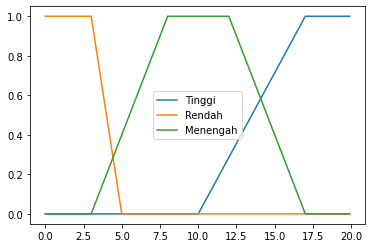

In [ ]:
grafik = np.arange(0, 20, 0.1)
plt.plot(grafik,[incomeTinggi(x) for x in grafik], label='Tinggi')
plt.plot(grafik,[incomeRendah(x) for x in grafik], label='Rendah')
plt.plot(grafik,[incomeMenengah(x) for x in grafik], label='Menengah')
plt.legend()

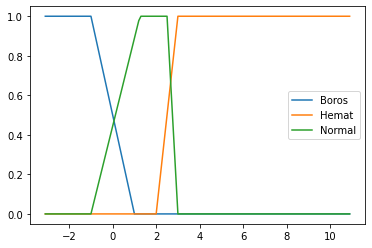

In [ ]:
grafik = np.arange(-3.1, 11, 0.1)
plt.plot(grafik,[boros(x) for x in grafik], label='Boros')
plt.plot(grafik,[hemat(x) for x in grafik], label='Hemat')
plt.plot(grafik,[normal(x) for x in grafik], label='Normal')
plt.legend()

## **FUZZIFICATION**

In [ ]:
# Memasukkan Fuzzification ke list
listIncome = [[listMahasiswa[i][0], incomeTinggi(listMahasiswa[i][1]), incomeRendah(listMahasiswa[i][1]), incomeMenengah(listMahasiswa[i][1])] for i in range(len(listMahasiswa))]
listSisa = [[listMahasiswa[i][0], boros(listMahasiswa[i][3]), hemat(listMahasiswa[i][3]), normal(listMahasiswa[i][3])] for i in range(len(listMahasiswa))]

## **INFERENCE**




| PENGHASILAN | SISA | SCORE |
| --- | --- | --- |
| TINGGI | BOROS | DITOLAK |
| TINGGI | HEMAT | DITOLAK |
| TINGGI | NORMAL | DITOLAK |
| RENDAH | BOROS | DITERIMA |
| RENDAH | HEMAT | DITERIMA |
| RENDAH | NORMAL | DITERIMA |
| MENENGAH | BOROS | DITERIMA |
| MENENGAH | HEMAT | DIPERTIMBANGKAN |
| MENENGAH | NORMAL | DIPERTIMBANGKAN |

In [ ]:
listInference = []
for i in range(len(listMahasiswa)):
  listTerima = []
  listTolak = []
  listPertimbangan = []

  listTolak.append(min(listIncome[i][1], listSisa[i][1]))
  listTolak.append(min(listIncome[i][1], listSisa[i][2]))
  listTolak.append(min(listIncome[i][1], listSisa[i][3]))

  listTerima.append(min(listIncome[i][2], listSisa[i][1]))
  listTerima.append(min(listIncome[i][2], listSisa[i][2]))
  listTerima.append(min(listIncome[i][2], listSisa[i][3]))
  listTerima.append(min(listIncome[i][3], listSisa[i][1]))

  listPertimbangan.append(min(listIncome[i][3], listSisa[i][2]))
  listPertimbangan.append(min(listIncome[i][3], listSisa[i][3]))

  terima = max(listTerima)
  tolak = max(listTolak)
  pertimbangan = max(listPertimbangan)

  listInference.append([listMahasiswa[i][0], terima, tolak, pertimbangan])

## **DEFUZZIFICATION - SUGENO**

In [ ]:
# nilaiTerima = 90
# nilaiPertimbangan = 70
# nilaiTolak = 45
# listNK = [[listMahasiswa[i][0], ((listInference[i][1]*nilaiTerima) + (listInference[i][2]*nilaiTolak) + (listInference[i][3]*nilaiPertimbangan)) / (listInference[i][1] + listInference[i][2] + listInference[i][3])] for i in range(len(listInference))]

## **DEFUZZIFICATION - MAMDANI**

In [ ]:
# Membership Mamdani
def accepted(a):
  if a > 80:
    return 1
  elif a <= 60:
    return 0
  else:
    return (a - 60) / (80 - 60)

def rejected(a):
  if a <= 40:
    return 1
  elif a > 60:
    return 0
  else:
    return (60 - a) / (60 - 40)

def considered(a):
  if a <= 40 or a > 80:
    return 0
  elif a > 40 and a < 60:
    return (a - 40) / (60 - 40)
  elif a == 60:
    return 1
  elif a > 60 and a <= 80:
    return (80 - a) / (80 - 60)

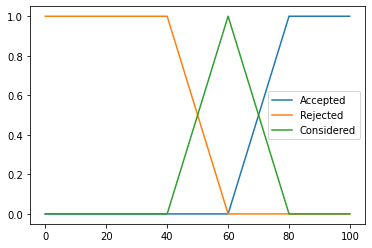

In [ ]:
grafik = np.arange(0, 100, 0.1)
plt.plot(grafik,[accepted(x) for x in grafik], label='Accepted')
plt.plot(grafik,[rejected(x) for x in grafik], label='Rejected')
plt.plot(grafik,[considered(x) for x in grafik], label='Considered')
plt.legend()

In [ ]:
angkaRandom = []
for i in range(3):
  kecil = []
  sedang = []
  besar = []
  kecil.append(random.randint(0, 60))
  sedang.append(random.randint(40, 80))
  besar.append(random.randint(60, 100))
angkaRandom = kecil + sedang + besar
angkaRandom.sort()

listNK = []
for i in range(len(listInference)):
  membershipRandom = []
  for j in range(len(angkaRandom)):
    terima = accepted(angkaRandom[j])
    tolak = rejected(angkaRandom[j])
    dipertimbangkan = considered(angkaRandom[j])

    if accepted(angkaRandom[j]) > listInference[i][1]:
      terima = listInference[i][1]
    if rejected(angkaRandom[j]) > listInference[i][2]:
      tolak = listInference[i][2]
    if considered(angkaRandom[j]) > listInference[i][3]:
      dipertimbangkan = listInference[i][3]

    nilai = max(terima, tolak, dipertimbangkan)

    membershipRandom.append([angkaRandom[j], nilai])
  
  a = 0
  b = 0
  for j in range(len(membershipRandom)):
    a = a + (membershipRandom[j][0] * membershipRandom[j][1])
    b += membershipRandom[j][1]
  
  z = a / b
  listNK.append([listInference[i][0], z])

## **SORTING**

In [ ]:
# Sorting berdasarkan nilai kelayakan terbesar
def sortNK(elem):
  return elem[1]
listNK = sorted(listNK, key=sortNK, reverse=True)

# Masukkan ID mahasiswa ke dalam listBeasiswa
listBeasiswa = [listNK[i][0] for i in range(20)]

# Masukkan Nilai Kelayakan ke dalam listNilaiKelayakan
listNilaiKelayakan = [listNK[i][1] for i in range(20)]

## **MAIN PROGRAM**

In [ ]:
print('Mahasiswa yang mendapatkan beasiswa\nID:', listBeasiswa, '\nNilai Kelayakan:', listNilaiKelayakan)

Mahasiswa yang mendapatkan beasiswa
ID: [4, 33, 41, 49, 50, 75, 79, 94, 25, 38, 99, 11, 13, 69, 52, 46, 7, 81, 47, 66] 
Nilai Kelayakan: [97.0, 97.0, 97.0, 97.0, 97.0, 97.0, 97.0, 97.0, 96.99999999999999, 94.63758389261747, 93.24480628860192, 93.14879649890591, 90.46938775510202, 88.38531587933979, 86.3211219232971, 86.11340206185565, 83.18013856812934, 82.33333333333334, 79.55393586005827, 79.55393586005827]


## **WRITE FILES**

In [ ]:
bantuan = pd.DataFrame(np.asarray(listBeasiswa), columns=['id'])
bantuan.to_excel("Bantuan.xlsx", index=False)
files.download('Bantuan.xlsx')